In [1]:
import sympy as sp

In [2]:
sp.init_printing()

In [3]:
from IPython.display import display

In [4]:
a = sp.Symbol("a", real=True, positive=True)

In [5]:
a

/home/vincent/miniconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/vincent/miniconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/vincent/miniconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/vincent/miniconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: Matpl

In [6]:
import warnings

In [7]:
warnings.filterwarnings("ignore", module="IPython")

In [8]:
a

In [9]:
b = sp.Symbol("b", real=True, positive=True)
display(b)

In [10]:
d = sp.Symbol("d", real=True, nonzero=True)
display(d)

In [11]:
d.assumptions0

{'real': True,
 'complex': True,
 'hermitian': True,
 'finite': True,
 'imaginary': False,
 'extended_real': True,
 'infinite': False,
 'commutative': True,
 'nonzero': True,
 'extended_nonzero': True,
 'zero': False}

In [12]:
q0, q1, q2 = sp.symbols("q_0 q_1 q_2", real=True, nonnegative=True)
display(q0, q1, q2)

In [13]:
u = a * q1 + a * q2 - (b * q1 ** 2 + 2 * d *q1 * q2 + b * q2 ** 2) / 2 + q0
display(u)

In [14]:
type(u)

sympy.core.add.Add

In [15]:
type(a)

sympy.core.symbol.Symbol

In [16]:
sp.srepr(a)

"Symbol('a', real=True, positive=True)"

In [17]:
sp.srepr(u)

"Add(Mul(Symbol('a', real=True, positive=True), Symbol('q_1', real=True, nonnegative=True)), Mul(Symbol('a', real=True, positive=True), Symbol('q_2', real=True, nonnegative=True)), Mul(Integer(-1), Rational(1, 2), Symbol('b', real=True, positive=True), Pow(Symbol('q_1', real=True, nonnegative=True), Integer(2))), Mul(Integer(-1), Rational(1, 2), Symbol('b', real=True, positive=True), Pow(Symbol('q_2', real=True, nonnegative=True), Integer(2))), Mul(Integer(-1), Symbol('d', real=True, nonzero=True), Symbol('q_1', real=True, nonnegative=True), Symbol('q_2', real=True, nonnegative=True)), Symbol('q_0', real=True, nonnegative=True))"

In [19]:
with open("utilite.dot", "w") as fichier:
    fichier.write(sp.printing.dotprint(u))

In [20]:
%%sh 
dot -Tsvg utilite.dot > utilite.svg

<img src="utilite.svg"/>

In [21]:
p1, p2, R = sp.symbols("p_1 p_2 R", real=True, nonnegative=True)
display(p1, p2, R)

In [22]:
c = R - q0 -p1 * q1 - p2 * q2
display(c)

In [24]:
print(sp.latex(u))

a q_{1} + a q_{2} - \frac{b q_{1}^{2}}{2} - \frac{b q_{2}^{2}}{2} - d q_{1} q_{2} + q_{0}


In [25]:
print(sp.latex(c))

R - p_{1} q_{1} - p_{2} q_{2} - q_{0}


# Objectif

$$
\begin{cases}
\max u(q_0, q_1, q_2)=a q_{1} + a q_{2} - \frac{b q_{1}^{2}}{2} - \frac{b q_{2}^{2}}{2} - d q_{1} q_{2} + q_{0}
\\
q_0\geq 0,\\
q_1\geq 0,\\
q_2\geq 0,\\
R - p_{1} q_{1} - p_{2} q_{2} - q_{0}
\geq 0,
\end{cases}
$$

Pour étudier une maximisation on a deux possibilités:
1. prouver qu'on maximise une fonction continue sur un domaine compact.
2. montrer que la fonction est concave et lui trouver un point critique.

Pour la première méthode les théorèmes usuels assurent la continuité et le caractère fermé du domaine.
Et on voit en utilisant $p_1, p_2>0$ que l'on a 
$$
\begin{cases}
0\leq q_0\leq R,\\
0\leq q_1\leq \frac{R}{p_1},\\
0\leq q_2\leq \frac{R}{p_2}
\end{cases}
$$
Donc on maximise sur un compact le maximum existe.

In [26]:
hessienne = sp.hessian(u, [q0, q1, q2])
display(hessienne)

⎡0  0   0 ⎤
⎢         ⎥
⎢0  -b  -d⎥
⎢         ⎥
⎣0  -d  -b⎦

In [27]:
type(hessienne)

sympy.matrices.dense.MutableDenseMatrix

In [28]:
hessienne.is_negative_definite

False

In [29]:
hessienne.is_negative_semidefinite

On n'a pas de réponse pour négative semidéfinie car cela dépend des paramètres en particulier on n'a pas encodé le fait que $b>|d|>0$.

In [31]:
sp.Matrix([[hessienne.cofactor(i,j) for j in range(3)] for i in range(3)])

⎡ 2    2      ⎤
⎢b  - d   0  0⎥
⎢             ⎥
⎢   0     0  0⎥
⎢             ⎥
⎣   0     0  0⎦

On en déduit que la matrice est bien négative dès que $b>|d|$ et donc que la fonction $u$ est concave.

In [33]:
# alternative
hessienne.QRdecomposition()

⎛⎡     0      ⎤                                 ⎞
⎜⎢            ⎥                                 ⎟
⎜⎢    -b      ⎥                                 ⎟
⎜⎢────────────⎥  ⎡      _________              ⎤⎟
⎜⎢   _________⎥  ⎢     ╱  2    2      2⋅b⋅d    ⎥⎟
⎜⎢  ╱  2    2 ⎥  ⎢0  ╲╱  b  + d    ────────────⎥⎟
⎜⎢╲╱  b  + d  ⎥, ⎢                    _________⎥⎟
⎜⎢            ⎥  ⎢                   ╱  2    2 ⎥⎟
⎜⎢    -d      ⎥  ⎣                 ╲╱  b  + d  ⎦⎟
⎜⎢────────────⎥                                 ⎟
⎜⎢   _________⎥                                 ⎟
⎜⎢  ╱  2    2 ⎥                                 ⎟
⎝⎣╲╱  b  + d  ⎦                                 ⎠

In [34]:
hessienne.eigenvals()

# Calcul

In [35]:
l0, l1, l2, l3 = sp.symbols(
    "\lambda_0 \lambda_1 \lambda_2 \lambda_3", 
    real=True, 
    nonnegative=True
)

In [36]:
display(l0, l1, l2, l3)

In [37]:
L = u + l0 * q0 + l1 * q1 + l2 * q2 + l3 * c
display(L)

In [38]:
gradient = [sp.diff(L, var) for var in (q0, q1, q2, l0, l1, l2, l3)]
display(gradient)

In [39]:
sp.solve(gradient, q0, q1, q2, l0, l1, l2, l3)

In [40]:
L3 = L.subs({l0: 0, l1: 0, l2: 0})
display(L3)

In [41]:
gradient = [sp.diff(L, var) for var in (q0, q1, q2, l3)]
display(gradient)

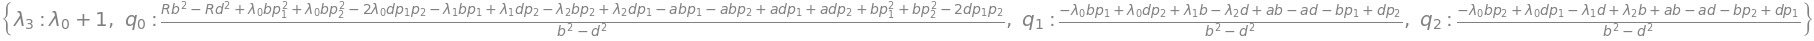

In [42]:
sp.solve(gradient, q0, q1, q2, l3)

In [43]:
from itertools import product

In [44]:
for choix in product(*[[True, False] for _ in range(4)]):
    print(choix)

(True, True, True, True)
(True, True, True, False)
(True, True, False, True)
(True, True, False, False)
(True, False, True, True)
(True, False, True, False)
(True, False, False, True)
(True, False, False, False)
(False, True, True, True)
(False, True, True, False)
(False, True, False, True)
(False, True, False, False)
(False, False, True, True)
(False, False, True, False)
(False, False, False, True)
(False, False, False, False)


In [45]:
from copy import deepcopy

In [50]:
solutions = list()
for combi in product(*[[True, False] for _ in range(4)]):
    Lc = deepcopy(L)
    variables = [q0, q1, q2]
    for choix, la in zip(combi, (l0, l1, l2, l3)):
        if choix:
            variables.append(la)
        else:
            Lc = Lc.subs(la, 0)
            
    gradient = [sp.diff(Lc, var) for var in variables]
    solution = sp.solve(gradient, *variables)
    if solution:
        solutions.append(solution)
        

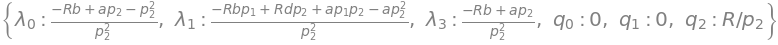

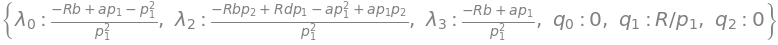

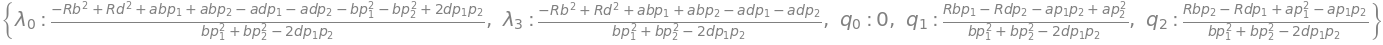

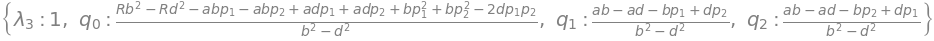

In [51]:
display(*solutions)

In [52]:
us = sp.Symbol("u", function=True)
display(us)

In [53]:
points_interessants = list()
for solution in solutions:
    points_interessants.append(
        {
            q0: solution[q0],
            q1: solution[q1],
            q2: solution[q2],
            us: u.subs(solution).simplify(),
        }
    )

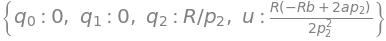

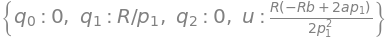

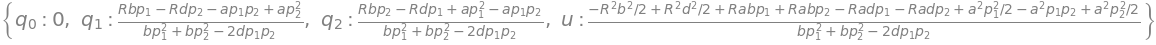

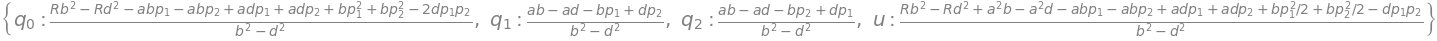

In [54]:
display(*points_interessants)

In [55]:
exp = points_interessants[5][us]
exp

In [62]:
exp.expand()

In [63]:
exp.expand().collect(b)

In [64]:
sp.srepr(exp.expand().collect(b))

"Add(Symbol('R', real=True, nonnegative=True), Mul(Pow(Symbol('b', real=True, positive=True), Integer(-1)), Add(Mul(Rational(1, 2), Pow(Symbol('a', real=True, positive=True), Integer(2))), Mul(Integer(-1), Symbol('a', real=True, positive=True), Symbol('p_1', real=True, nonnegative=True)), Mul(Rational(1, 2), Pow(Symbol('p_1', real=True, nonnegative=True), Integer(2))))))"

In [67]:
second = exp.expand().collect(b).args[1]

In [68]:
sp.srepr(second)

"Mul(Pow(Symbol('b', real=True, positive=True), Integer(-1)), Add(Mul(Rational(1, 2), Pow(Symbol('a', real=True, positive=True), Integer(2))), Mul(Integer(-1), Symbol('a', real=True, positive=True), Symbol('p_1', real=True, nonnegative=True)), Mul(Rational(1, 2), Pow(Symbol('p_1', real=True, nonnegative=True), Integer(2)))))"

In [72]:
num, den = second.as_numer_denom()
num, den

In [73]:
num.simplify()

In [74]:
num.factor()